# GROUP 5: Personal Fasion Recommendation System

# Data Analysis

### Credits

<div class="alert alert-block alert-info">
Data Analysis peformed by <b> (38) Tola Ogunyale (Final) + (1) Shuyaib Abdulkadir <b>
</div>

## Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Loading the Data

In [5]:
df = pd.read_csv("train/transactions_train.csv")
df_articles = pd.read_csv('train/articles.csv')
df_customers = pd.read_csv('train/customers.csv')

## Exploring the Data

### Preliminary exploration

In [7]:
print("df: ", df.shape, "\ndf_articles: " , df_articles.shape, "\ndf_customers: ",df_customers.shape)

df:  (31788324, 5) 
df_articles:  (105542, 25) 
df_customers:  (1371980, 7)


In [8]:
print("df: ", df.columns, "\ndf_articles: " , df_articles.columns, "\ndf_customers: ",df_customers.columns)

df:  Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id'], dtype='object') 
df_articles:  Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object') 
df_customers:  Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code'],
      dtype='object')


In [9]:
df.info()
print()
df_articles.info()
print()
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearan

In [10]:
df

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1


In [11]:
df_articles

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,953450001,953450,5pk regular Placement1,302,Socks,Socks & Tights,1010014,Placement print,9,Black,...,Socks Bin,F,Menswear,3,Menswear,26,Men Underwear,1021,Socks and Tights,Socks in a fine-knit cotton blend with a small...
105538,953763001,953763,SPORT Malaga tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,2,H&M+,1005,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
105539,956217002,956217,Cartwheel dress,265,Dress,Garment Full body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."
105540,957375001,957375,CLAIRE HAIR CLAW,72,Hair clip,Accessories,1010016,Solid,9,Black,...,Small Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Large plastic hair claw.


In [12]:
df_customers

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
...,...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,NaN,NaN,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,NaN,NaN,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...


### Missing Data

In [13]:
print("df: ", df.isnull().sum().sum(), "\ndf_articles: " , df_articles.isnull().sum().sum(), "\ndf_customers: ",df_customers.isnull().sum().sum())

df:  0 
df_articles:  416 
df_customers:  1840560


In [ ]:
df_articles.isnull()

In [ ]:
null_articles = df_articles[df_articles.isnull().any(axis=1)]
null_articles

Missing data in the 'articles.csv' came from empty item descriptions

In [16]:
null_customers = df_customers[df_customers.isnull().values.any(axis=1)]
null_customers

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
5,000064249685c11552da43ef22a5030f35a147f723d5b0...,NaN,NaN,NaN,NaN,NaN,2c29ae653a9282cce4151bd87643c907644e09541abc28...
...,...,...,...,...,...,...,...
1371968,ffff4c4e8b57b633c1ddf8fbd53db16b962cf831baf9ed...,NaN,NaN,ACTIVE,NONE,40.0,3b4a300713f8b142836a67caa5b6d5b3f10a7650c06820...
1371972,ffff8f9ecdce722b5bab97fff68a6d1866492209bfe524...,NaN,NaN,ACTIVE,NONE,52.0,0de9d1ec7dc785301ca5fbe8949cfc2cfbd77e7a807270...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,NaN,NaN,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,NaN,NaN,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...


Missing data in the 'customers.csv' came from empty member and newsletter statuses.

## Exploring 'Articles.csv'

In [17]:
plt.style.use('classic')
sns.set_style("darkgrid")

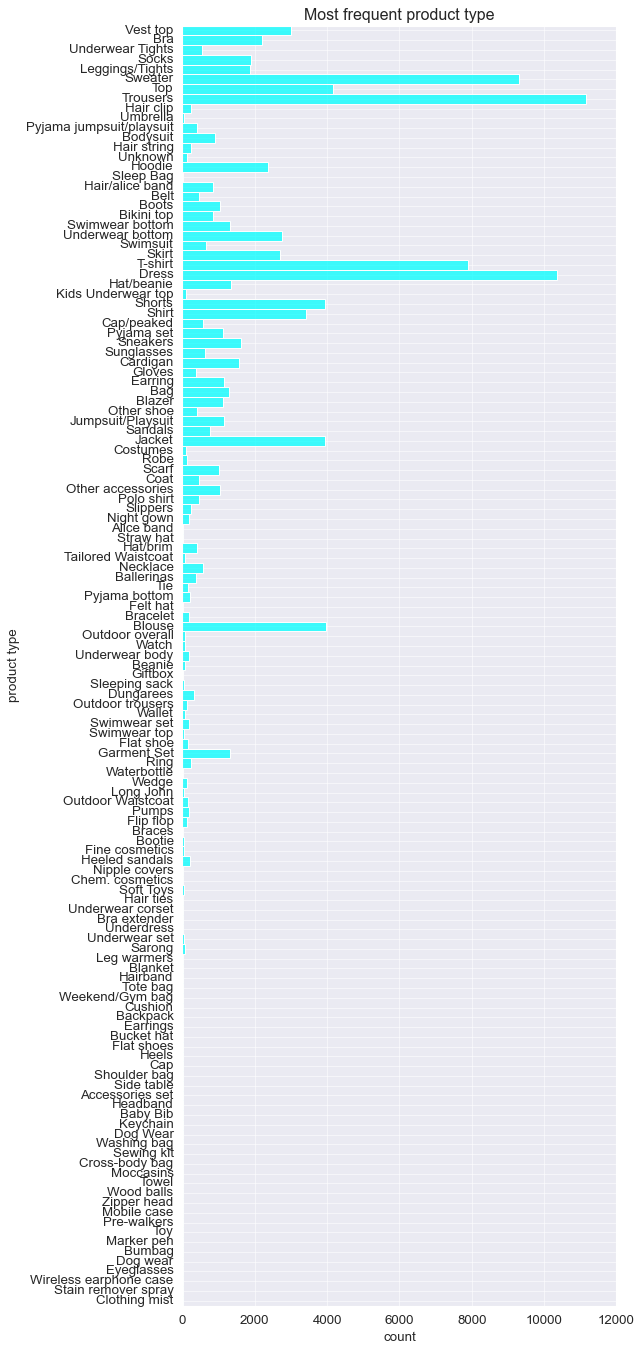

In [23]:
# Most frequent product type
f, ax = plt.subplots(figsize=(7,20))
ax = sns.histplot(data=df_articles, y="product_type_name", color="cyan")
ax.set_title('Most frequent product type')
ax.set_xlabel('count')
ax.set_ylabel('product type')
plt.show()

In [ ]:
df_product_types = pd.DataFrame(df_articles['product_type_name'].value_counts().items(), columns=['Product Type', 'Count'])
df_product_types

**Most common product types**: trousers and dresses

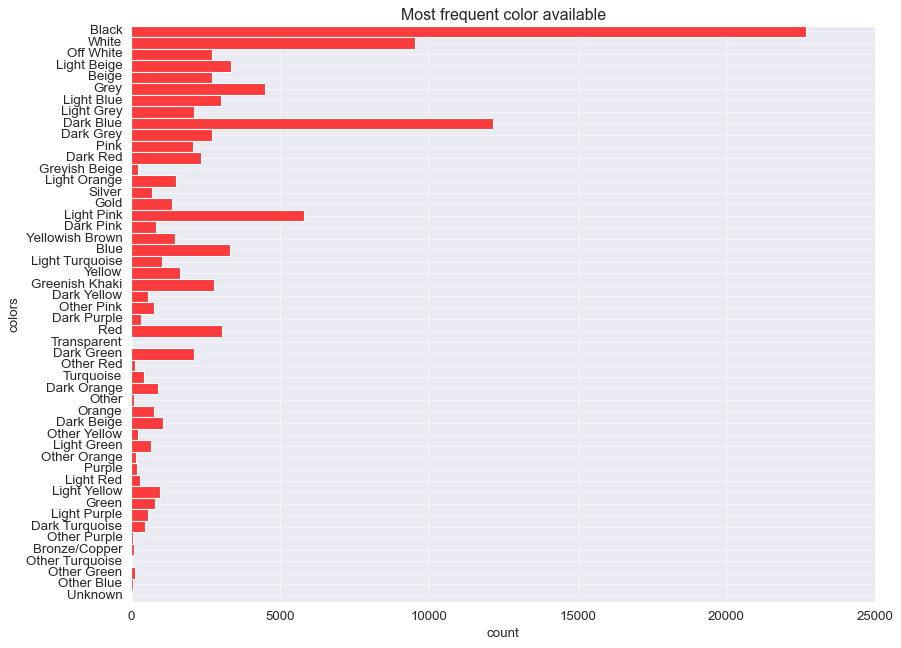

In [25]:
# Most frequent item color available
f, ax = plt.subplots(figsize=(12,9))
ax = sns.histplot(data=df_articles, y="colour_group_name", color="red")
ax.set_title('Most frequent color available')
ax.set_xlabel('count')
ax.set_ylabel('colors')

plt.show()

In [ ]:
df_product_colors = pd.DataFrame(df_articles['colour_group_name'].value_counts().items(), columns=['Color', 'Count'])
df_product_colors

**Most common color available:** Black

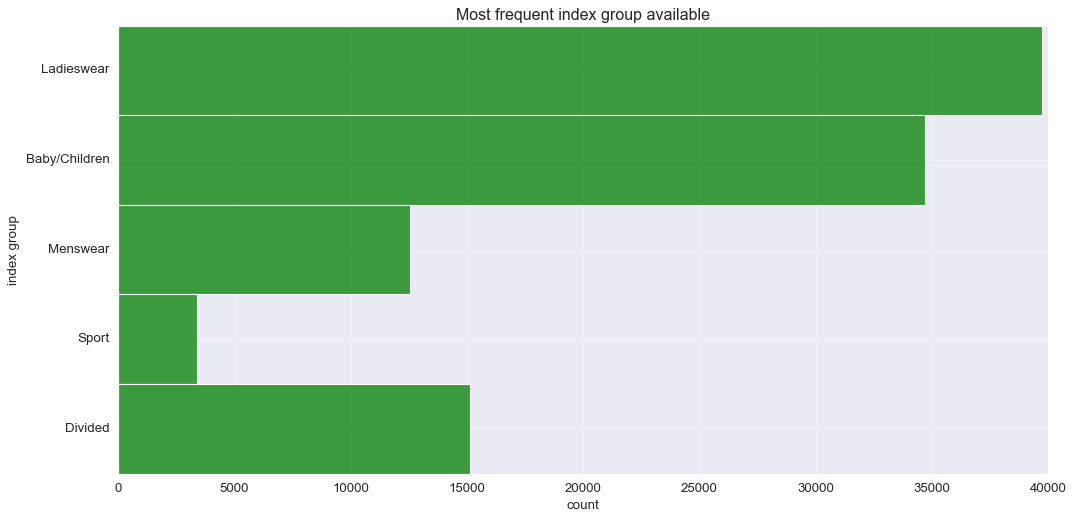

In [27]:
# Most frequent index group available
f, ax = plt.subplots(figsize=(15,7))
ax = sns.histplot(data=df_articles, y="index_group_name", color="green")
ax.set_title('Most frequent index group available')
ax.set_xlabel('count')
ax.set_ylabel('index group')
plt.show()

In [ ]:
df_product_indexgroup = pd.DataFrame(df_articles['index_group_name'].value_counts().items(), columns=['index group', 'Count'])
df_product_indexgroup

**Most prevalent index group**: Ladieswear + Baby/Children

### Exploring 'Customers.csv'

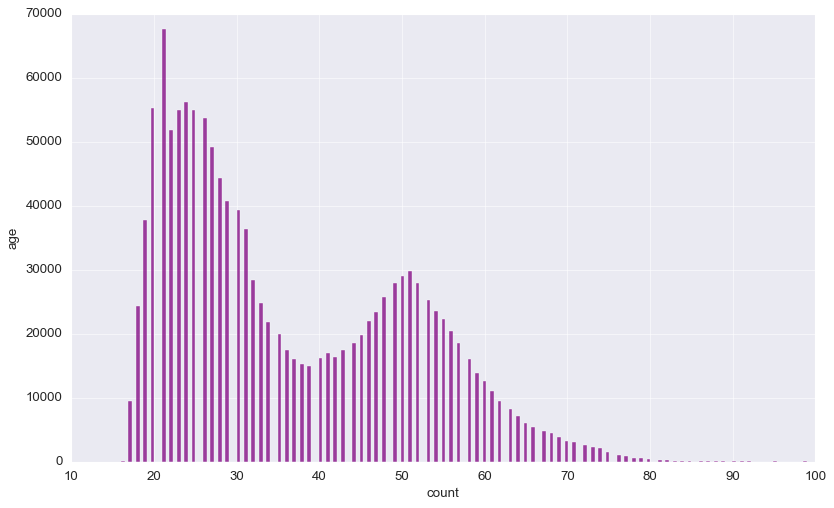

In [32]:
f, ax = plt.subplots(figsize=(12,7))
ax = sns.histplot(data=df_customers, x="age", color="purple")
ax.set_xlabel('count')
ax.set_ylabel('age')
plt.show()

In [33]:
df_customer_ages = pd.DataFrame(df_customers['age'].value_counts().items(), columns=['age', 'Count'])
df_customer_ages

,age,Count
0,21.0,67530
1,24.0,56124
2,20.0,55196
3,25.0,54989
4,23.0,54867
...,...,...
79,98.0,7
80,97.0,4
81,93.0,4
82,96.0,3


#### Who are the customers of H&M? (age)

In [34]:
# Adding 5-year age groups
df_customers["age_group"]= pd.cut(df_customers['age'], bins=[15, 19, 25, 29, 35, 39, 45, 49, 55, 59, 65, 69, 75, 79, 85, 89], right=True, labels=['under 20', '20-25', '26-29', '30-35', '36-39', '40-45', '46-49', '50-55', '56-59','60-65','66-69','70-75','76-79','80-85','86-89'])

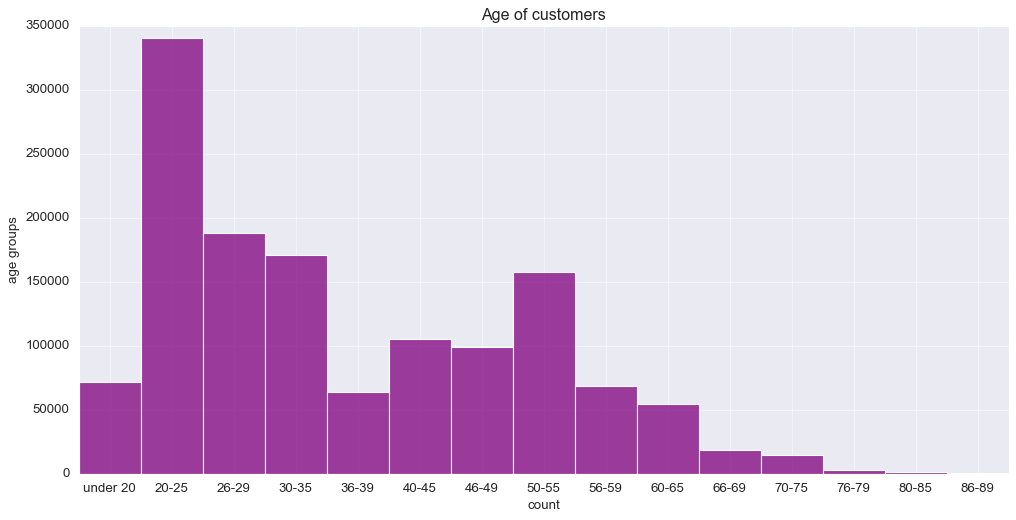

In [38]:
f, ax = plt.subplots(figsize=(15,7))
ax = sns.histplot(data=df_customers, x="age_group", color="purple")
ax.set_title('Age of customers')
ax.set_xlabel('count')
ax.set_ylabel('age groups')
plt.show()

### Exploring 'Transactions.csv' (training set)

In [39]:
df['t_dat'] = pd.to_datetime(df['t_dat'])

In [ ]:
plt.figure(figsize=(15, 7))
df.groupby('t_dat')['price'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


In [67]:
## Visualization for original dataset.
y_original = df['t_dat'].value_counts().rename_axis('date').reset_index(name='Purchases')
y_original["Period"] = pd.to_datetime(y_original["date"])
y_original = y_original.set_index("Period")
y_original["year"] = y_original.index.year
y_original["Month"] = y_original.index.month_name()
y_original["month_number"] = y_original.index.month
y_original = y_original.sort_values('month_number')


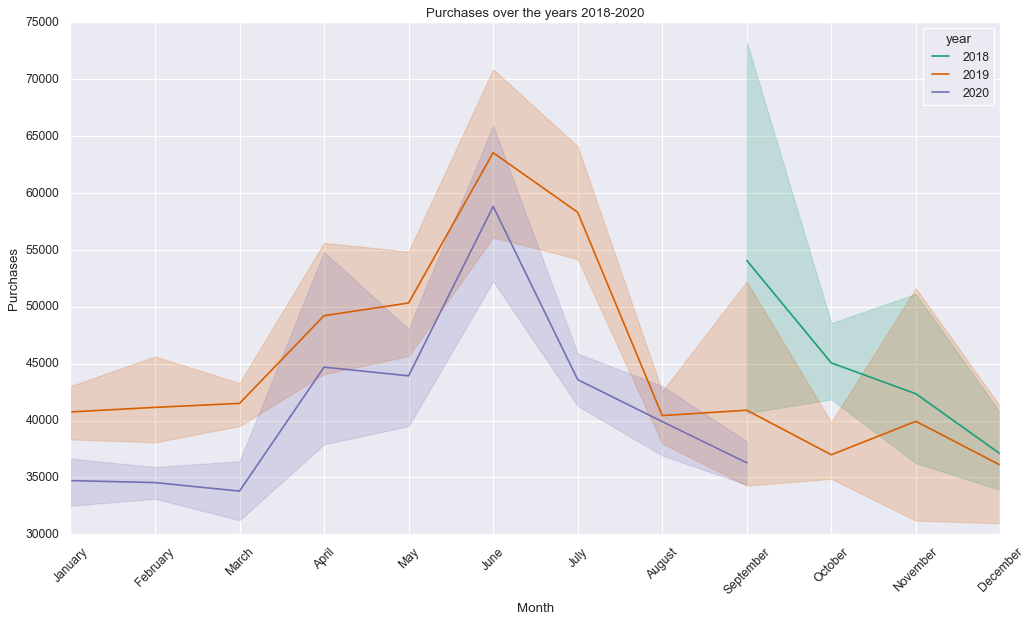

In [66]:
sns.set(rc={'figure.figsize':(15,8)})
lineplot = sns.lineplot(x="Month", y="Purchases", data=y_original, hue="year", palette="Dark2")
lineplot.set(title='Purchases over the years 2018-2020')
plt.xticks(rotation=45)
plt.show()

In [42]:
# What customer ids bought the most items?
df_customer_purchases = pd.DataFrame(df['customer_id'].value_counts().items(), columns=['customer id', 'Count'])
df_customer_purchases.sort_values(by=['Count'], ascending=False)
df_customer_purchases

,customer id,Count
0,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,1895
1,b4db5e5259234574edfff958e170fe3a5e13b6f146752c...,1441
2,49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05...,1364
3,a65f77281a528bf5c1e9f270141d601d116e1df33bf9df...,1361
4,cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed...,1237
...,...,...
1362276,63b70b71291668f0a63ade8e321fb3eccb80eba164f208...,1
1362277,950b172c36d169bf427545991fe66371f21a085799b447...,1
1362278,7c284f13f4af9d6a53f97279381638ed0cb7afaa4fd4f3...,1
1362279,62d49d0ae11a4f65fa31e354cb87f6b557ebec648e0e5e...,1


In [ ]:
# What article was bought the most?
df_most_bought = pd.DataFrame(df['article_id'].value_counts().items(), columns=['article_id', 'count'])
df_most_bought.sort_values(by=['count'], ascending=False)
df_most_bought

In [45]:
top_sold = df_most_bought
top_sold = pd.merge(top_sold, df_articles, on='article_id')[['article_id', 'prod_name', 'count',
       'product_type_name', 'product_group_name','graphical_appearance_name','colour_group_name',
       'department_name', 'index_name','index_group_name','section_name', 'garment_group_name', 'detail_desc']]
top_sold.head(10)

,article_id,prod_name,count,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc
0,706016001,Jade HW Skinny Denim TRS,50287,Trousers,Garment Lower body,Solid,Black,Trousers,Divided,Divided,Divided Collection,Trousers,High-waisted jeans in washed superstretch deni...
1,706016002,Jade HW Skinny Denim TRS,35043,Trousers,Garment Lower body,Solid,Light Blue,Trousers,Divided,Divided,Divided Collection,Trousers,High-waisted jeans in washed superstretch deni...
2,372860001,7p Basic Shaftless,31718,Socks,Socks & Tights,Solid,Black,Shopbasket Socks,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,Fine-knit trainer socks in a soft cotton blend.
3,610776002,Tilly (1),30199,T-shirt,Garment Upper body,Solid,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,T-shirt in lightweight jersey with a rounded h...
4,759871002,Tilda tank,26329,Vest top,Garment Upper body,Solid,Black,EQ Divided Basics,Divided,Divided,Divided Complements Other,Jersey Basic,"Cropped, fitted top in cotton jersey with narr..."
5,464297007,Greta Thong Mynta Low 3p,25025,Underwear bottom,Underwear,Placement print,Black,Casual Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear",Thong briefs in cotton jersey with a wide lace...
6,372860002,7p Basic Shaftless,24458,Socks,Socks & Tights,Solid,White,Shopbasket Socks,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,Fine-knit trainer socks in a soft cotton blend.
7,610776001,Tilly (1),22451,T-shirt,Garment Upper body,Solid,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,T-shirt in lightweight jersey with a rounded h...
8,399223001,Curvy Jeggings HW Ankle,22236,Trousers,Garment Lower body,Solid,Black,Denim Trousers,Divided,Divided,Ladies Denim,Trousers Denim,"Jeggings in washed, superstretch denim with a ..."
9,706016003,Jade HW Skinny Denim TRS,21241,Trousers,Garment Lower body,Solid,Dark Blue,Trousers,Divided,Divided,Divided Collection,Trousers,High-waisted jeans in washed superstretch deni...


#### What kind of products were bought the most?

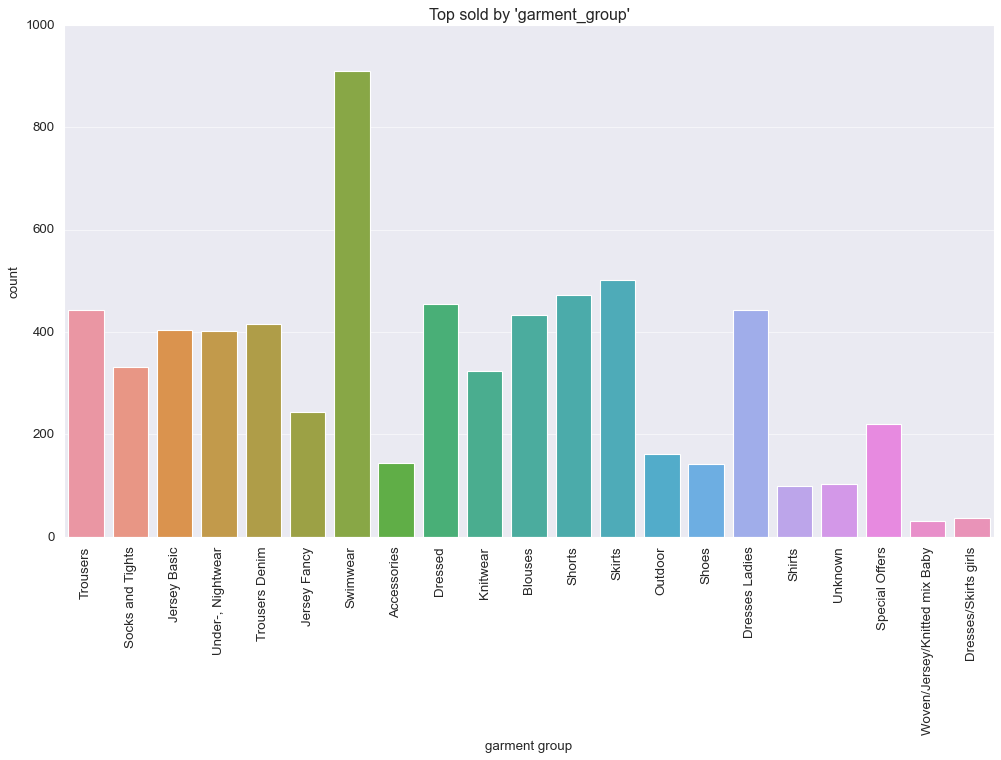

In [48]:
# by garment group
f, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(data=top_sold, x='garment_group_name', y='count', errorbar=None)

ax.set_ylabel('count')
plt.xticks(rotation=90)
ax.set_xlabel('garment group')
plt.title("Top sold by 'garment_group'")
plt.show()

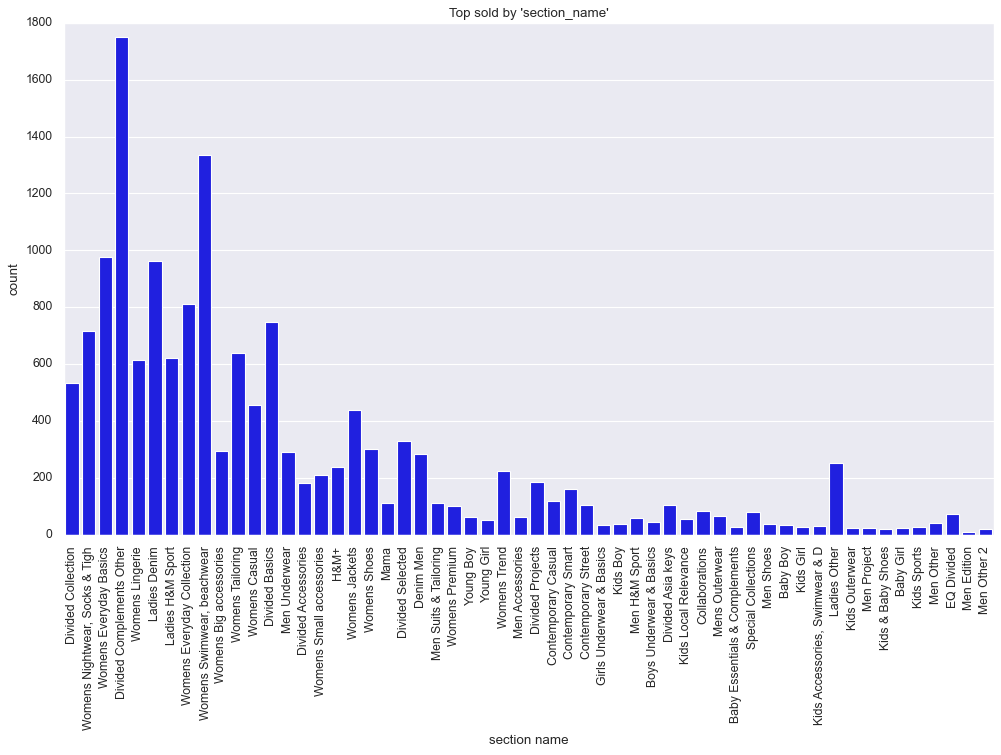

In [70]:
#by section name
f, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(data=top_sold, x='section_name', y='count', color="blue", errorbar=None)

ax.set_ylabel('count')
plt.xticks(rotation=90)
ax.set_xlabel('section name')
plt.title("Top sold by 'section_name'")
plt.show()

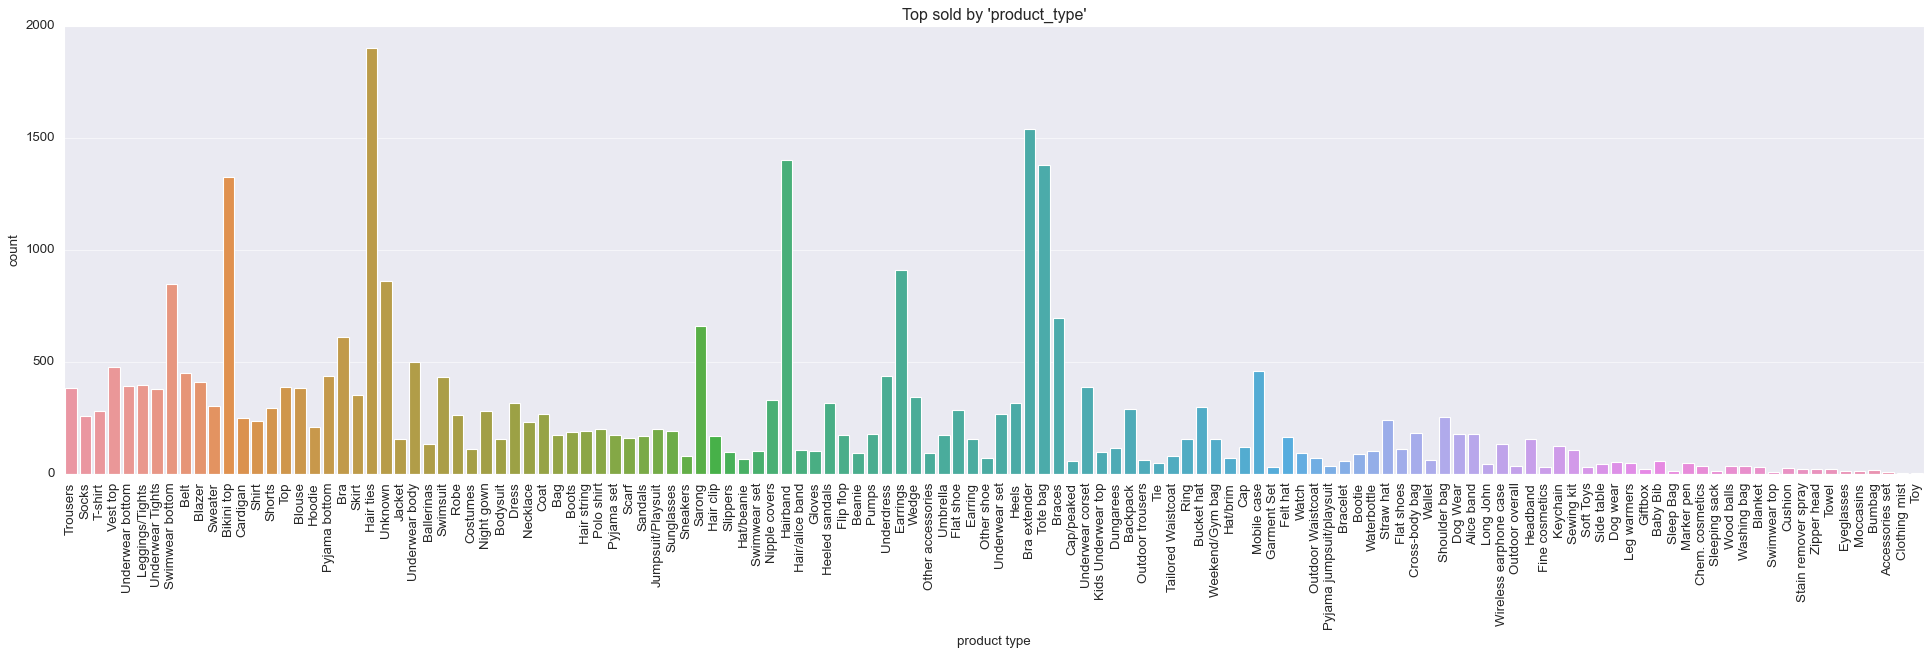

In [51]:
# By produc type
f, ax = plt.subplots(figsize=(30,7))
ax = sns.barplot(data=top_sold, x='product_type_name', y='count', errorbar=None)
ax.set_title("Top sold by 'product_type'")
ax.set_ylabel('count')
plt.xticks(rotation=90)
ax.set_xlabel('product type')
plt.show()

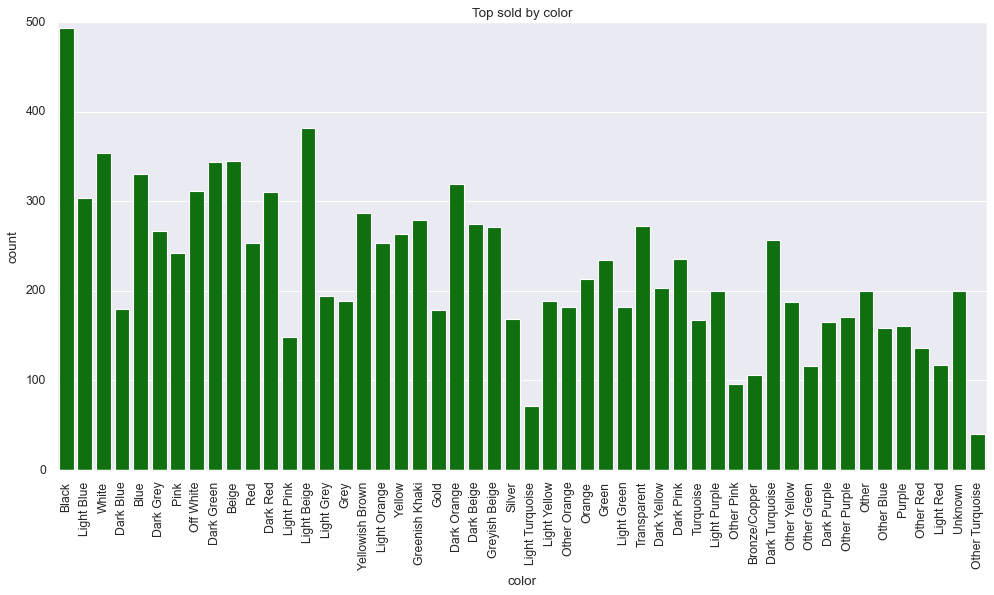

In [72]:
# By color
f, ax = plt.subplots(figsize=(15,7))
ax = sns.barplot(data=top_sold, x='colour_group_name', y='count', color="green",errorbar=None)
ax.set_title("Top sold by color")
ax.set_ylabel('count')
plt.xticks(rotation=90)
ax.set_xlabel('color')
plt.show()

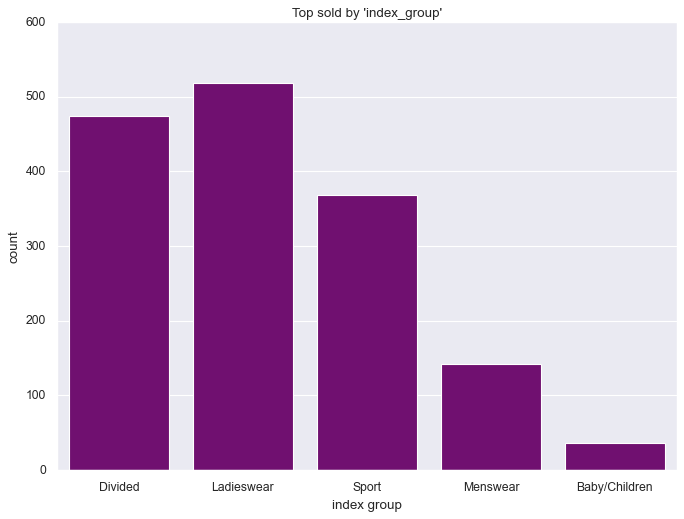

In [73]:
#By index group
f, ax = plt.subplots(figsize=(10,7))
ax = sns.barplot(data=top_sold, x='index_group_name', y='count', color="purple", errorbar=None)
ax.set_title("Top sold by 'index_group'")
ax.set_ylabel('count')
ax.set_xlabel('index group')
plt.show()

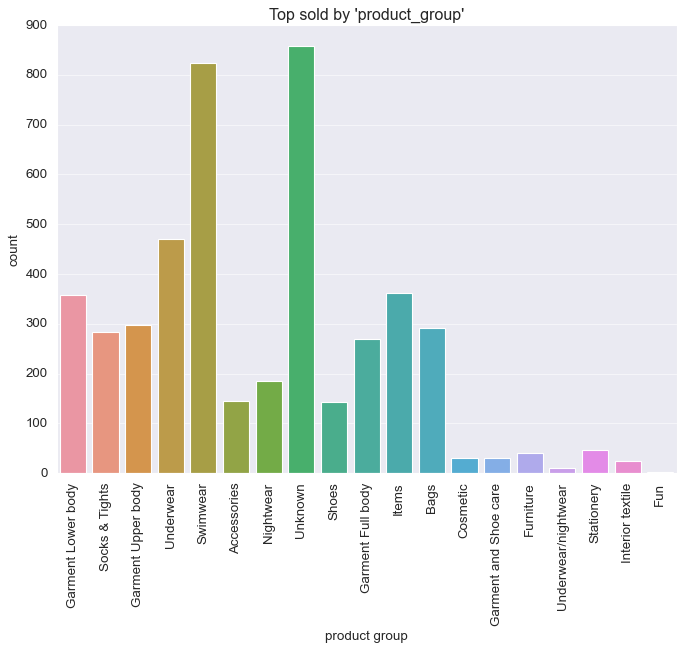

In [59]:
#By product group
f, ax = plt.subplots(figsize=(10,7))
ax = sns.barplot(data=top_sold, x='product_group_name', y='count', color="red", errorbar=None)
ax.set_title("Top sold by 'product_group'")
ax.set_ylabel('count')
plt.xticks(rotation=90)

ax.set_xlabel('product group')
plt.show()

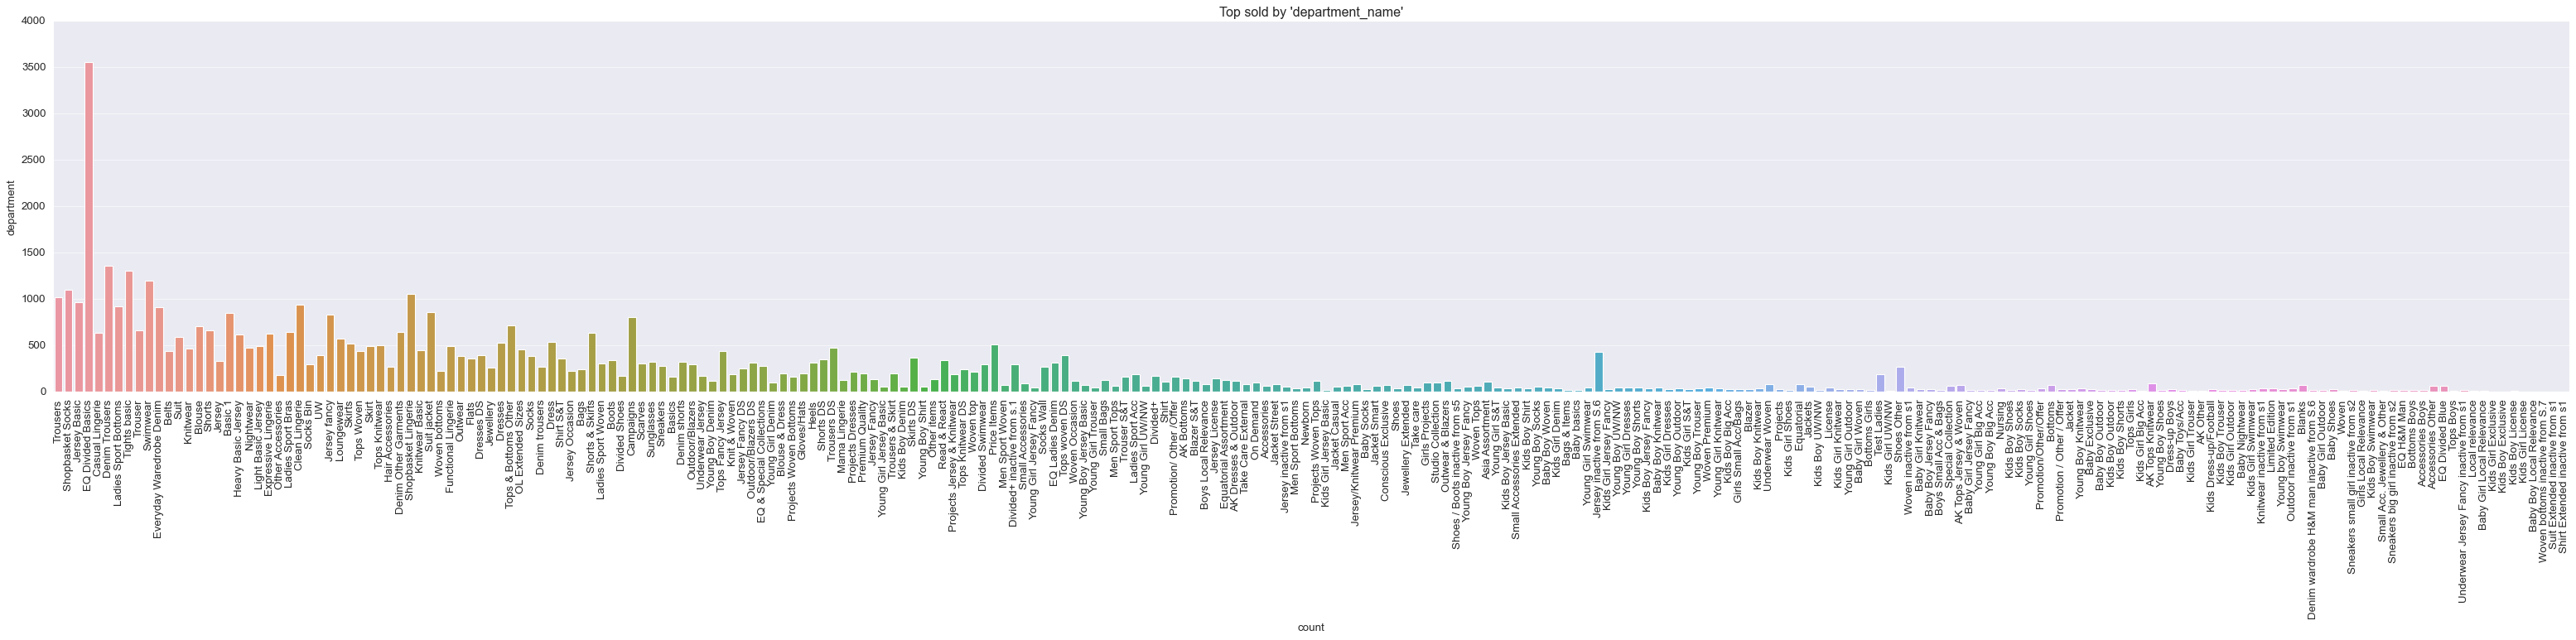

In [63]:
#by department name
f, ax = plt.subplots(figsize=(49,7))
ax = sns.barplot(data=top_sold, x='department_name', y='count', errorbar=None)
ax.set_title("Top sold by 'department_name'")
ax.set_xlabel('count')
plt.xticks(rotation=90)
ax.set_ylabel('department')
plt.show()

# Building the Model

### Credits

<div class="alert alert-block alert-info">
Models built by: <b>  <li> (1) Shuyaib Abdulkadir  <b>(Final Model)<li> (38) Tola Ogunyale (Preliminary model)
</div>

## Imports

In [1]:
import pandas as pd
import requests
import scipy.sparse as sp
import numpy as np
import zipfile
import io
import seaborn as sns
import warnings
import os
import turicreate as tc
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from scipy.io import arff
from sklearn.model_selection import train_test_split

## Loading and Extracing the Data from Kaggle

In [2]:
!pip install kaggle;

In [3]:
!mkdir ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/kaggle.json

In [3]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle competitions download -c 'h-and-m-personalized-fashion-recommendations'

100%|██████████████████████████████████████▉| 28.7G/28.7G [03:44<00:00, 104MB/s]
100%|███████████████████████████████████████| 28.7G/28.7G [03:44<00:00, 137MB/s]


In [ ]:
!unzip h-and-m-personalized-fashion-recommendations.zip;

In [4]:
articles_df = pd.read_csv('articles.csv')
customers_df = pd.read_csv('customers.csv')
transactions_df = pd.read_csv('transactions_train.csv')

## Exploring the Data for Model

In [5]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


In [5]:
transactions_df.columns

Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id'], dtype='object')

In [6]:
transactions_df.sort_values('t_dat')

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
32262,2018-09-20,a8c2e2e62e27ccde83cbe03e8281cef5e1df94ed79d493...,569933006,0.042356,2
32263,2018-09-20,a8c2e2e62e27ccde83cbe03e8281cef5e1df94ed79d493...,621846006,0.025407,2
32264,2018-09-20,a8c5ba583d218ffe2d822f19eccc65e1bc7b4ef14f7a05...,587189003,0.016949,1
32265,2018-09-20,a8c5ba583d218ffe2d822f19eccc65e1bc7b4ef14f7a05...,587189002,0.033898,1
...,...,...,...,...,...
31766405,2020-09-22,544094a3ab237bf18d7bda9c2265218de4320ce795775e...,865938002,0.025407,1
31766404,2020-09-22,544094a3ab237bf18d7bda9c2265218de4320ce795775e...,839332001,0.067780,1
31766403,2020-09-22,54379cac12fed6e91d95beac2879679be3c51bb96f1462...,865938003,0.025407,1
31766497,2020-09-22,54e8ebd39543b5a4d69c3e7d79977558d2a606e6540ba0...,928210002,0.067780,2


In [7]:
transactions_df.head(5)

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [8]:
transactions_df.tail(5)

,t_dat,customer_id,article_id,price,sales_channel_id
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1
31788323,2020-09-22,fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20...,898573003,0.033881,2


In [113]:
articles_df.head(5)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [114]:
customers_df.head(5)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [93]:
### Visualization for original dataset.
transactions_original = transactions_df['t_dat'].value_counts().rename_axis('date').reset_index(name='Purchases')
transactions_original["Period"] = pd.to_datetime(transactions_original["date"])
transactions_original = transactions_original.set_index("Period")
transactions_original["year"] = transactions_original.index.year
transactions_original["Month"] = transactions_original.index.month_name()
transactions_original["month_number"] = transactions_original.index.month
transactions_original = transactions_original.sort_values('month_number')
transactions_original.head()

,date,Purchases,year,Month,month_number
Period,,,,,
2020-01-01,2020-01-01,12760,2020,January,1
2020-01-29,2020-01-29,36833,2020,January,1
2019-01-09,2019-01-09,53309,2019,January,1
2020-01-09,2020-01-09,36746,2020,January,1
2020-01-23,2020-01-23,36257,2020,January,1


### Splitting the Data

In [6]:
def query_based_on_date(transactions_df, start_date='2020-06-22', end_date='2020-09-22'):
    x = transactions_df[(transactions_df['t_dat'] > start_date) & (transactions_df['t_dat'] <= end_date)]
    return x

In [7]:
start_date = '2020-01-01'
x = query_based_on_date(transactions_df, start_date)
train_x = query_based_on_date(x, start_date, '2020-07-22')
test_x = query_based_on_date(x, '2020-07-23')

In [8]:
print(train_x['t_dat'])

20820952    2020-01-02
20820953    2020-01-02
20820954    2020-01-02
20820955    2020-01-02
20820956    2020-01-02
               ...    
29361343    2020-07-22
29361344    2020-07-22
29361345    2020-07-22
29361346    2020-07-22
29361347    2020-07-22
Name: t_dat, Length: 8540396, dtype: object


In [69]:
print(test_x['t_dat'])

29406324    2020-07-24
29406325    2020-07-24
29406326    2020-07-24
29406327    2020-07-24
29406328    2020-07-24
               ...    
31788319    2020-09-22
31788320    2020-09-22
31788321    2020-09-22
31788322    2020-09-22
31788323    2020-09-22
Name: t_dat, Length: 2382000, dtype: object


In [9]:
train_x.shape, test_x.shape

((8540396, 5), (2382000, 5))

In [10]:
""" 
The purpose of this code is to:
Identify the unique customers in the training and test sets.
Determine the number of unique customers in each set.
Ensure that the data types of the customer ID sets are correct (sets).
"""
train_customers = set(train_x['customer_id'].unique().tolist())
test_customers = set(test_x['customer_id'].unique().tolist())
print(len(train_customers), len(test_customers))
print(type(train_customers), type(test_customers))

769650 400458
<class 'set'> <class 'set'>


In [13]:
train_test_overlap = train_customers.intersection(test_customers)
print(len(train_test_overlap) / len(test_customers))

0.7715690534338183


In [14]:
customers_to_remove = test_customers - train_test_overlap
print(len(customers_to_remove))
test_customers-=customers_to_remove
print(len(test_customers))

91477
308981


In [17]:
def filter_rows_by_values(transactions_df, col, values):
    return transactions_df[transactions_df[col].isin(values)]

In [18]:
test_x = filter_rows_by_values(test_x,'customer_id',train_test_overlap)
print(test_x.shape)

(1993171, 5)


In [20]:
test_x_temp = test_x.sample(frac = 0.5)
val_x = test_x.drop(test_x_temp.index)

In [21]:
print(val_x.shape)
print(test_x_temp.shape)

(996585, 5)
(996586, 5)


In [77]:
test_x = test_x_temp
print(test_x.shape)

(996586, 5)


### Visualizing the Data and Data split

In [78]:
sns.set(rc={'figure.figsize':(15,8)})

In [22]:
### Visualization for original dataset.
y_original = transactions_df['t_dat'].value_counts().rename_axis('date').reset_index(name='Purchases')
y_original["Period"] = pd.to_datetime(y_original["date"])
y_original = y_original.set_index("Period")
y_original["year"] = y_original.index.year
y_original["Month"] = y_original.index.month_name()
y_original["month_number"] = y_original.index.month
y_original = y_original.sort_values('month_number')
y_original.head()

,date,Purchases,year,Month,month_number
Period,,,,,
2020-01-01,2020-01-01,12760,2020,January,1
2020-01-29,2020-01-29,36833,2020,January,1
2019-01-09,2019-01-09,53309,2019,January,1
2020-01-09,2020-01-09,36746,2020,January,1
2020-01-23,2020-01-23,36257,2020,January,1


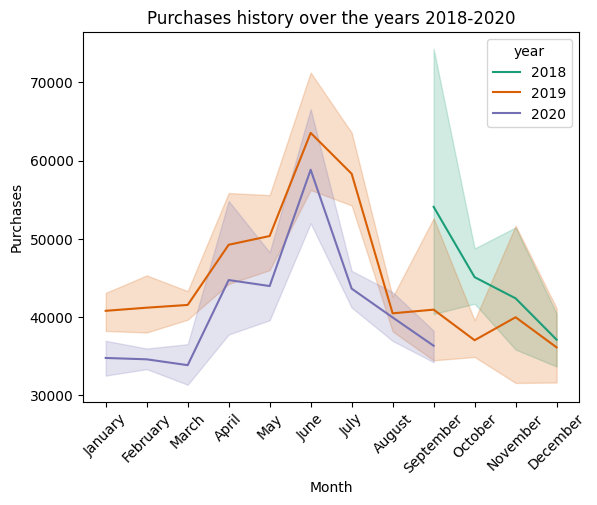

In [23]:
lineplot = sns.lineplot(x="Month", y="Purchases", data=y_original, hue="year", palette="Dark2")
lineplot.set(title='Purchases history over the years 2018-2020')
plt.xticks(rotation=45)
plt.show()

In [24]:
y = x['t_dat'].value_counts().rename_axis('date').reset_index(name='Purchases')
y["Period"] = pd.to_datetime(y["date"])
y = y.set_index("Period")
y["year"] = y.index.year
y["Month"] = y.index.month_name()
y["month_number"] = y.index.month
y.head()

,date,Purchases,year,Month,month_number
Period,,,,,
2020-04-11,2020-04-11,162799,2020,April,4
2020-06-17,2020-06-17,110981,2020,June,6
2020-06-24,2020-06-24,98790,2020,June,6
2020-06-25,2020-06-25,88684,2020,June,6
2020-06-18,2020-06-18,84563,2020,June,6


[Text(0.5, 1.0, 'Bar graph for Purchases from January to September (2020)')]

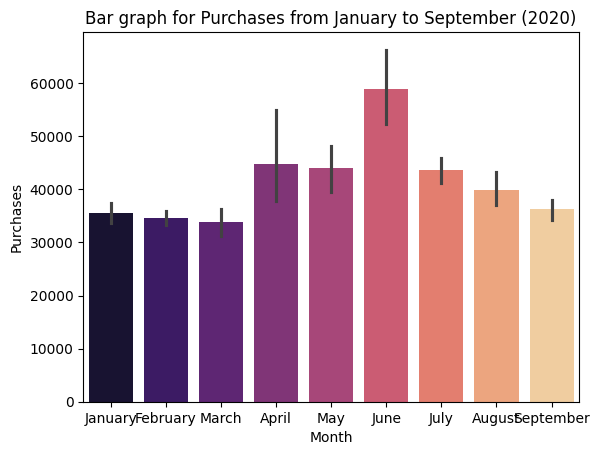

In [25]:
### barplot for sampled dataset (9 months)
y = y.sort_values('month_number')
sns.barplot(x = 'Month', y='Purchases', data = y,  palette = 'magma').set(title='Bar graph for Purchases from January to September (2020)')

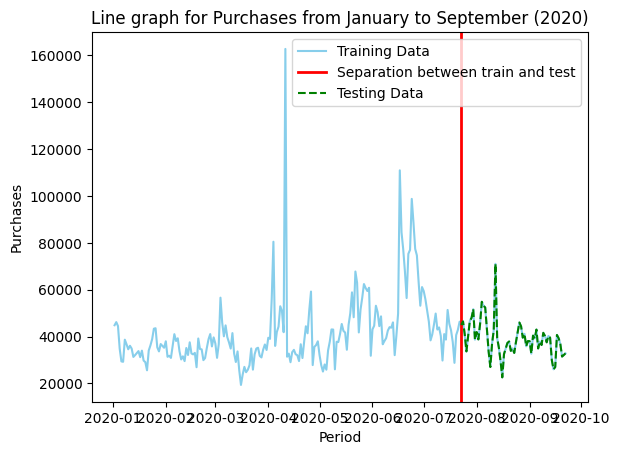

In [26]:
sns.lineplot(x="Period", y="Purchases", data=y, color='skyblue', label="Training Data") # plot normal time series plot
# plot subset on top of the normal time series
plt.axvline(pd.to_datetime('2020-07-23'), color='r', lw=2, label="Separation between train and test")
g=sns.lineplot(x="Period",y="Purchases",data=y[(y['date'] >= '2020-07-23') & (y['date'] <= '2020-09-22')], linestyle="dashed", color='green', label="Testing Data").set(title='Line graph for Purchases from January to September (2020)')

In [27]:
sample_x = query_based_on_date(x, '2020-09-18')

In [28]:
df_test = pd.merge(articles_df, sample_x, on=['article_id'], how='left') 
df_test_merged = pd.merge(df_test, customers_df, on=['customer_id'], how='left')  

In [29]:
y_product_group = df_test_merged['product_group_name'].value_counts().rename_axis('Product group').reset_index(name='Purchases').head(5)
y_product_group_list = list(y_product_group['Product group'])
df_prod_filtered = filter_rows_by_values(df_test_merged,'product_group_name',y_product_group_list)

Text(0, 0.5, 'Price')

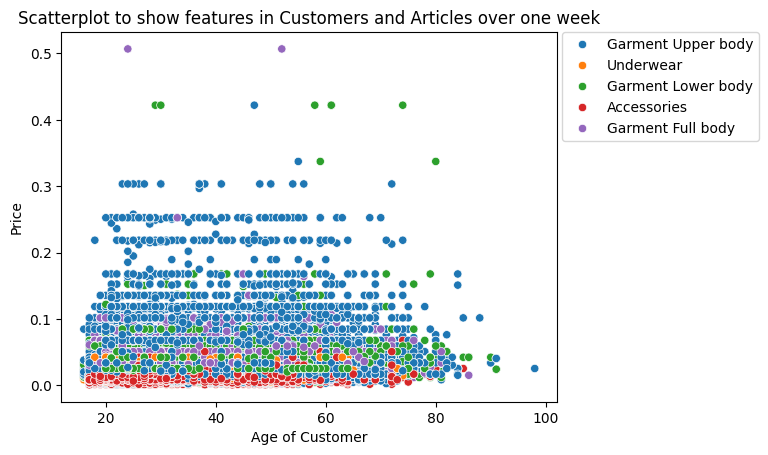

In [30]:
## Scatterplot
sns.scatterplot(data = df_prod_filtered, x = "age", y = "price", hue = "product_group_name")
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.title("Scatterplot to show features in Customers and Articles over one week")
plt.xlabel("Age of Customer")
plt.ylabel("Price")

## Build and Train a Model Using TuriCreate

In [31]:
import scipy.sparse as sp

In [32]:
unique_customers = train_x['customer_id'].unique()
unique_articles = train_x['article_id'].unique()

### Create the user-item matrix as a sparse matrix

In [35]:
sf_train_x = tc.SFrame(train_x)

In [36]:
user_item_matrix = tc.recommender.create(sf_train_x, 
                                        user_id='customer_id',
                                        item_id='article_id',
                                        target='price')

Preparing data set.

Data has 8540396 observations with 769650 users and 53644 items.

Data prepared in: 7.86852s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 1067549 / 8540396 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 12.5              | Not Viable                               |

| 1       | 3.125             | Not Viable                               |

| 2       | 0.78125           | Not Viable                               |

| 3       | 0.195312          | Not Viable                               |

| 4       | 0.0488281         | Not Viable                               |

| 5       | 0.012207          | 0.000107795                              |

| 6       | 0.00610352        | 0.000152781                              |

| 7       | 0.00305176        | 0.000209131                              |

| 8       | 0.00152588        | 0.000270942                              |

+---------+-------------------+------------------------------------------+

| Final   | 0.012207          | 0.000107795                              |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 171us        | 0.000542236       | 0.0165564             |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 15.53s       | 0.000448898       | 0.0132562             | 0.012207    |

| 2       | 30.68s       | 0.000302247       | 0.0102619             | 0.012207    |

| 3       | 45.70s       | 0.000228613       | 0.00877741            | 0.012207    |

| 4       | 1m 0s        | 0.000186222       | 0.00797221            | 0.012207    |

| 5       | 1m 15s       | 0.000158978       | 0.00743488            | 0.012207    |

| 7       | 1m 43s       | 0.000137965       | 0.00668122            | 0.012207    |

| 8       | 1m 57s       | 0.000130023       | 0.00634317            | 0.012207    |

| 9       | 2m 11s       | 0.000124255       | 0.00609948            | 0.012207    |

| 10      | 2m 25s       | 0.000119604       | 0.00590492            | 0.012207    |

| 11      | 2m 38s       | 0.000115855       | 0.00572942            | 0.012207    |

| 12      | 2m 52s       | 0.000112885       | 0.00559937            | 0.012207    |

| 13      | 3m 6s        | 0.000110192       | 0.00547127            | 0.012207    |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Convergence on objective within bounds.

Computing final objective value and training RMSE.

Final objective value: 0.00010385

Final training RMSE: 0.00488256

In [55]:
column_types = [str, int, str, int, str, str, int, str, int, str, int, str, int, str, int, str, str, str, int, str, int, str, int, str, str]
articles_df = tc.SFrame.read_csv('articles.csv', column_type_hints=column_types)

Finished parsing file /home/azureuser/articles.csv

Parsing completed. Parsed 105542 lines in 0.650297 secs.

### The calculate_similarity() function uses Turi Create's tc.toolkits.distances.cosine() function to calculate the cosine similarity between article feature vectors.

In [79]:
def calculate_similarity(articles_df, article_i, article_j):
    # Ensure both articles exist
    if not (articles_df['article_id'] == article_i).any() or not (articles_df['article_id'] == article_j).any():
        return 0.0

    # Apply one-hot encoding if product_group_name is a feature
    if 'product_group_name' in articles_df.column_names():
        articles_df = one_hot_encode(articles_df, 'product_group_name')

    # List all features excluding the 'article_id'
    features = [col for col in articles_df.column_names() if col != 'article_id']

    # Get the rows for each article
    article_i_row = articles_df[articles_df['article_id'] == article_i]
    article_j_row = articles_df[articles_df['article_id'] == article_j]

    # Select the features for similarity calculation
    article_i_features = article_i_row.select_columns(features)
    article_j_features = article_j_row.select_columns(features)

    # Calculate cosine similarity
    similarity = tc.toolkits.distances.cosine(article_i_features[0], article_j_features[0])
    return similarity

In [62]:
print(articles_df.head())

+------------+--------------+---------------------------+-----------------+
| article_id | product_code |         prod_name         | product_type_no |
+------------+--------------+---------------------------+-----------------+
| 0108775015 |    108775    |         Strap top         |       253       |
| 0108775044 |    108775    |         Strap top         |       253       |
| 0108775051 |    108775    |       Strap top (1)       |       253       |
| 0110065001 |    110065    |     OP T-shirt (Idro)     |       306       |
| 0110065002 |    110065    |     OP T-shirt (Idro)     |       306       |
| 0110065011 |    110065    |     OP T-shirt (Idro)     |       306       |
| 0111565001 |    111565    |    20 den 1p Stockings    |       304       |
| 0111565003 |    111565    |    20 den 1p Stockings    |       302       |
| 0111586001 |    111586    | Shape Up 30 den 1p Tights |       273       |
| 0111593001 |    111593    |  Support 40 den 1p Tights |       304       |
+-----------

### Model Functions

In [43]:
def item_based_collaborative_filtering(train_x, k=12):
    """
    Implement the Item-Based Collaborative Filtering approach using Turicreate.
    
    Args:
        train_x (turicreate.SFrame): The training data SFrame.
        k (int): The number of top recommendations to make for each customer.
        
    Returns:
        turicreate.SFrame: The recommendations for each customer.
    """
    # Create an item similarity model
    item_sim_model = tc.item_similarity_recommender.create(train_x,
                                                           user_id='customer_id',
                                                           item_id='article_id',
                                                           target='purchase_count',
                                                           similarity_type='cosine')
    
    # Get recommendations for each customer
    recommendations = item_sim_model.recommend(users=train_x['customer_id'].unique(), k=k)
    
    return recommendations

In [111]:
def user_based_collaborative_filtering(train_x, k=12):
    """
    Implement the User-Based Collaborative Filtering approach using Turicreate.
    
    Args:
        train_x (turicreate.SFrame): The training data SFrame.
        k (int): The number of top recommendations to make for each customer.
        
    Returns:
        turicreate.SFrame: The recommendations for each customer.
    """
    # Create a user similarity model
    user_sim_model = tc.recommender.create(train_x,
                                           user_id='customer_id',
                                           item_id='article_id',
                                           target='purchase_count',
                                           similarity_type='pearson')
    
    # Get recommendations for each customer
    recommendations = user_sim_model.recommend(users=train_x['customer_id'].unique(), k=k)
    
    return recommendations

In [ ]:
from scipy.spatial.distance import cosine
article_features = articles_df[['product_type', 'color', 'department']].values

# Create the article feature matrix
X = np.array([np.hstack((one_hot_encode(row['product_type']),
                        one_hot_encode(row['color']),
                        one_hot_encode(row['department'])))
              for _, row in articles_df.iterrows()])

def one_hot_encode(feature_value):
    encoded = np.zeros(len(set(articles_df[feature_name])))
    encoded[list(set(articles_df[feature_name])).index(feature_value)] = 1
    return encoded

# Calculate the article-article similarity matrix
article_similarity_matrix = 1 - pairwise_distances(X, metric='cosine')

def content_based_recommendations(customer_purchases, k=12):
    """
    Generate content-based recommendations for a customer.
    
    Args:
        customer_purchases (list): List of article IDs purchased by the customer.
        k (int): Number of top recommendations to generate.
        
    Returns:
        list: List of recommended article IDs.
    """
    recommendations = []
    for article_id in customer_purchases:
        article_idx = np.where(articles_df['article_id'] == article_id)[0][0]
        similar_articles = np.argsort(article_similarity_matrix[article_idx])[-k-1:-1]
        recommendations.extend([articles_df['article_id'].iloc[idx] for idx in similar_articles])
    
    # Remove articles the customer has already purchased
    recommendations = list(set(recommendations) - set(customer_purchases))
    
    return recommendations[:k]


### Evaluate The Models

In [ ]:
from sklearn.metrics import precision_score, recall_score, ndcg_score

def evaluate_recommender_models(val_x, item_based_recs, user_based_recs, content_based_recs, hybrid_recs, k=12):
    """
    Evaluate the performance of the recommender models.
    
    Args:
        val_x (turicreate.SFrame): The validation data.
        item_based_recs (turicreate.SFrame): The recommendations from the item-based collaborative filtering model.
        user_based_recs (turicreate.SFrame): The recommendations from the user-based collaborative filtering model.
        content_based_recs (list): The recommendations from the content-based filtering model.
        hybrid_recs (list): The recommendations from the hybrid model.
        k (int): The number of top recommendations to evaluate.
        
    Returns:
        dict: A dictionary containing the evaluation metrics for each model.
    """
    eval_results = {}
    
    # Evaluate Item-Based Collaborative Filtering
    item_based_precision = precision_score(val_x['article_id'], item_based_recs['article_id'], average='micro')
    item_based_recall = recall_score(val_x['article_id'], item_based_recs['article_id'], average='micro')
    item_based_ndcg = ndcg_score(val_x['article_id'], item_based_recs['score'], k=k)
    eval_results['item_based'] = {'precision': item_based_precision, 'recall': item_based_recall, 'ndcg': item_based_ndcg}
    
    # Evaluate User-Based Collaborative Filtering
    user_based_precision = precision_score(val_x['article_id'], user_based_recs['article_id'], average='micro')
    user_based_recall = recall_score(val_x['article_id'], user_based_recs['article_id'], average='micro')
    user_based_ndcg = ndcg_score(val_x['article_id'], user_based_recs['score'], k=k)
    eval_results['user_based'] = {'precision': user_based_precision, 'recall': user_based_recall, 'ndcg': user_based_ndcg}
    
    # Evaluate Content-Based Filtering
    content_based_precision = precision_score(val_x['article_id'], content_based_recs, average='micro')
    content_based_recall = recall_score(val_x['article_id'], content_based_recs, average='micro')
    content_based_ndcg = ndcg_score(val_x['article_id'], content_based_recs, k=k)
    eval_results['content_based'] = {'precision': content_based_precision, 'recall': content_based_recall, 'ndcg': content_based_ndcg}
    
    # # Evaluate Hybrid Approach
    # hybrid_precision = precision_score(val_x['article_id'], hybrid_recs, average='micro')
    # hybrid_recall = recall_score(val_x['article_id'], hybrid_recs, average='micro')
    # hybrid_ndcg = ndcg_score(val_x['article_id'], hybrid_recs, k=k)
    # eval_results['hybrid'] = {'precision': hybrid_precision, 'recall': hybrid_recall, 'ndcg': hybrid_ndcg}
    
    return eval_results


eval_results = evaluate_recommender_models(val_x, item_based_recs, user_based_recs, content_based_recs)
print(eval_results)


### Final Testing Recommender Model

In [ ]:
model_paths = {
    'collaborative_filtering': 'path_to_collaborative_filtering_model',
    'content_based': 'path_to_content_based_model',
    'hybrid': 'path_to_hybrid_model'
}

results = {}
for model_name, path in model_paths.items():
    model = tc.load_model(path)
    results[model_name] = model.evaluate(test_x.csv)